Nim examples and notes on this kernel
============

In [1]:
echo "hello world!"

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block1 [Processing]
CC: INim_block1
CC: stdlib_system
Hint:  [Link]
Hint: operation successful (10344 lines compiled; 1.711 sec total; 15.504MiB; Debug Build) [SuccessX]


hello world!


Import
------------
If the host system as the correct package installed, you can use `import` like normal

In [2]:
import math
var x = 5.0
echo x.pow(2.0)

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block2 [Processing]
Hint: math [Processing]
CC: INim_block2
CC: stdlib_math
Hint:  [Link]
Hint: operation successful (10922 lines compiled; 0.364 sec total; 16.004MiB; Debug Build) [SuccessX]


25.0


In [3]:
import sequtils
var s : seq[char] = toSeq("hello notebook!".items)
var z : seq[char] = toSeq("!koobeton olleh".items)
echo zip(s,z)

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block3 [Processing]
Hint: sequtils [Processing]
CC: INim_block3
CC: stdlib_system
CC: stdlib_sequtils
Hint:  [Link]
Hint: operation successful (11283 lines compiled; 1.764 sec total; 16.004MiB; Debug Build) [SuccessX]


@[(a: h, b: !), (a: e, b: k), (a: l, b: o), (a: l, b: o), (a: o, b: b), (a:  , b: e), (a: n, b: t), (a: o, b: o), (a: t, b: n), (a: e, b:  ), (a: b, b: o), (a: o, b: l), (a: o, b: l), (a: k, b: e), (a: !, b: h)]


## How to show the tempfile name
Show tempfile name for this cell which happens to be the module name and therefor has a limited charset


In [6]:
template FILE: string = instantiationInfo().filename

echo "Module tempfile: '" & FILE() & "'"

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block6 [Processing]
CC: INim_block6
Hint:  [Link]
Hint: operation successful (10346 lines compiled; 0.450 sec total; 15.504MiB; Debug Build) [SuccessX]


Module tempfile: 'block6.nim'


## Every block  is separate
For now, every block is considered a separate `.nim` file.
As an example, we can't access `x` from block 2

In [7]:
echo x

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block7 [Processing]
block7.nim(1, 6) Error: undeclared identifier: 'x'


See? We got `undeclared identifier: 'x'`

## Simple procs

In [8]:
proc square(x:int):int =
    result = x*x

echo square(5)

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block8 [Processing]
CC: INim_block8
Hint:  [Link]
Hint: operation successful (10347 lines compiled; 0.433 sec total; 15.504MiB; Debug Build) [SuccessX]


25


## Unicode identifiers

In [9]:
proc `×` (a,b:int):int = 
    result = a*b
echo ×(32, 12)

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block9 [Processing]
CC: INim_block9
Hint:  [Link]
Hint: operation successful (10346 lines compiled; 0.476 sec total; 15.504MiB; Debug Build) [SuccessX]


384


## Json parsing

In [10]:
import json
 
var data = parseJson("""{ "foo": 1, "bar": [10, "apples"] }""")
echo data["foo"]
echo data["bar"]
 
var js = %[%{"name": %"John", "age": %30}, %{"name": %"Susan", "age": %31}]
echo js

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block10 [Processing]
Hint: json [Processing]
Hint: hashes [Processing]
Hint: strutils [Processing]
Hint: parseutils [Processing]
Hint: math [Processing]
Hint: algorithm [Processing]
Hint: etcpriv [Processing]
Hint: tables [Processing]
Hint: lexbase [Processing]
Hint: streams [Processing]
Hint: unicode [Processing]
Hint: macros [Processing]
CC: INim_block10
CC: stdlib_system
CC: stdlib_json
CC: stdlib_hashes
CC: stdlib_tables
CC: stdlib_strutils
CC: stdlib_lexbase
CC: stdlib_streams
CC: stdlib_unicode
CC: stdlib_macros
CC: stdlib_etcpriv
CC: stdlib_parseutils
CC: stdlib_math
CC: stdlib_algorithm
Hint:  [Link]
Hint: operation successful (20959 lines compiled; 2.275 sec total; 37.504MiB; Debug Build) [SuccessX]


1
[10,"apples"]
[{"name":"John","age":30},{"name":"Susan","age":31}]


Plotting
========

For, a single plot for block is available.

Hint: used config file 'C:\Dev\Nim-devel\config\nim.cfg' [Conf]
Hint: system [Processing]
Hint: block14 [Processing]
Hint: graph [Processing]
Hint: nimage [Processing]
Hint: image [Processing]
Hint: strfmt [Processing]
Hint: macros [Processing]
Hint: strutils [Processing]
Hint: parseutils [Processing]
Hint: math [Processing]
Hint: algorithm [Processing]
Hint: unicode [Processing]
Hint: streams [Processing]
Hint: unsigned [Processing]
Hint: png [Processing]
Hint: loadpng [Processing]
Hint: bytestream [Processing]
Hint: dbgutil [Processing]
Hint: filter [Processing]
Hint: streamhelper [Processing]
Hint: zutil [Processing]
Hint: zlib [Processing]
Hint: savepng [Processing]
Hint: sequtils [Processing]
Hint: os [Processing]
Hint: times [Processing]
Hint: winlean [Processing]
Hint: dynlib [Processing]
CC: INim_block14
Hint:  [Link]
Hint: operation successful (27313 lines compiled; 0.815 sec total; 45.004MiB; Debug Build) [SuccessX]


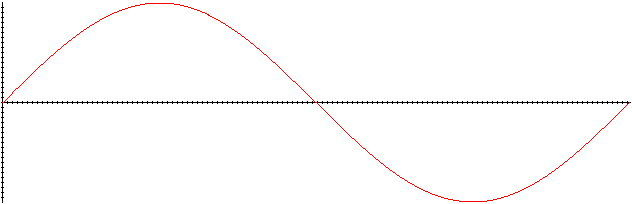

In [14]:
#>inlineplot 640 480
import graph,math,sequtils

proc sin (x:openarray[float]):seq[float] =
  result = map(x) do (x:float)->float : 
    sin(x)

let xx = linspace(0.0,2*Pi,0.01)

plot(xx,sin(xx))